In [1]:
import yaml
import os

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# Load the configuration file
with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# Access the settings
project_folder = config['projectFolder']
df_path = os.path.join(project_folder, config['rawDataFile'])
df = pd.read_csv(df_path)

# Display the first few rows
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,10/03/2017 02:00,55.2,16.98,3170.410,539.673,399.697,10.15890,1.66910,249.291,248.269,...,249.774,462.601,488.724,441.674,433.629,448.477,480.866,489.382,67.06,1.11
1,10/03/2017 03:00,55.2,16.98,3365.650,573.517,399.023,10.08600,1.70565,249.379,253.312,...,249.060,456.445,440.432,456.625,432.736,464.334,445.950,432.906,66.97,1.27
2,10/03/2017 04:00,55.2,16.98,2693.750,592.133,409.204,9.94880,1.72472,248.302,251.906,...,249.236,459.248,480.114,453.814,433.885,438.642,421.974,408.193,66.75,1.36
3,10/03/2017 05:00,55.2,16.98,2352.216,601.807,398.145,9.84375,1.75928,248.950,246.313,...,252.686,558.545,548.280,551.960,561.720,543.070,529.260,514.240,66.63,1.34
4,10/03/2017 06:00,55.2,16.98,3313.960,626.099,399.785,9.74710,1.77000,248.379,250.532,...,251.323,559.346,534.120,539.332,538.596,545.270,575.404,595.680,66.85,1.15


In [4]:
# Check data types and missing values
print("Data types and missing values:")
df.info()

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          3925 non-null   object 
 1   % Iron Feed                   3925 non-null   float64
 2   % Silica Feed                 3925 non-null   float64
 3   Starch Flow                   3925 non-null   float64
 4   Amina Flow                    3925 non-null   float64
 5   Ore Pulp Flow                 3925 non-null   float64
 6   Ore Pulp pH                   3925 non-null   float64
 7   Ore Pulp Density              3925 non-null   float64
 8   Flotation Column 01 Air Flow  3925 non-null   float64
 9   Flotation Column 02 Air Flow  3925 non-null   float64
 10  Flotation Column 03 Air Flow  3925 non-null   float64
 11  Flotation Column 04 Air Flow  3925 non-null   float64
 12  Flotation Column 05 Air Flow  3

In [5]:
# Summary statistics
print("Summary statistics:")
df.describe()

Summary statistics:


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,...,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000
mean,56.285661,14.670431,2836.654811,488.433674,397.501596,9.767838,1.680964,280.128163,277.119326,281.116639,...,290.766086,520.452849,523.286713,531.594141,421.575527,426.241166,430.972674,421.619552,65.043068,2.333597
std,5.165404,6.823196,1232.483539,91.626140,9.658453,0.387038,0.069130,29.730057,30.151385,28.547711,...,28.826321,131.107835,128.913286,150.202214,90.477129,83.881945,90.196521,84.578366,1.120171,1.129771
min,42.740000,1.310000,0.561482,241.702368,376.291000,8.753375,1.519837,175.847339,177.560227,176.941580,...,195.026000,152.346000,211.336333,127.120281,162.717796,167.225020,159.870000,177.474268,62.050000,0.600000
25%,52.670000,8.980000,2054.140000,432.908000,394.186000,9.526190,1.647150,250.291000,250.541000,250.914000,...,255.860000,417.458000,441.764000,411.138000,357.408000,358.597000,359.397000,357.235000,64.350000,1.440000
50%,56.080000,13.850000,2989.890000,504.648000,399.240000,9.800220,1.698240,299.360000,296.199000,298.705000,...,299.048000,491.978000,496.497000,494.079000,412.561000,409.507194,426.205000,411.116000,65.210000,2.000000
75%,59.720000,19.600000,3724.610000,555.143000,402.833000,10.036800,1.729080,300.146000,300.680000,300.375000,...,301.891000,594.013000,595.650000,601.435000,486.687000,483.063000,494.310000,478.637000,65.850000,3.010000
max,65.780000,33.400000,6288.990000,739.304000,418.600000,10.807792,1.852825,372.442637,367.251000,304.541000,...,371.248000,861.600571,828.599547,886.773000,679.490000,674.076707,698.570061,656.747500,68.010000,5.530000


In [6]:
# Check for missing values
print("Missing values count:")
print(df.isnull().sum())

Missing values count:
date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64


In [7]:
# Impute missing values with median
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    missing_count = df[column].isnull().sum()
    if missing_count > 0:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
        print(f"Imputed {missing_count} missing values in '{column}' with median: {median_value}")
    else:
        print(f"No missing values found in '{column}' - no imputation needed")

No missing values found in '% Iron Feed' - no imputation needed
No missing values found in '% Silica Feed' - no imputation needed
No missing values found in 'Starch Flow' - no imputation needed
No missing values found in 'Amina Flow' - no imputation needed
No missing values found in 'Ore Pulp Flow' - no imputation needed
No missing values found in 'Ore Pulp pH' - no imputation needed
No missing values found in 'Ore Pulp Density' - no imputation needed
No missing values found in 'Flotation Column 01 Air Flow' - no imputation needed
No missing values found in 'Flotation Column 02 Air Flow' - no imputation needed
No missing values found in 'Flotation Column 03 Air Flow' - no imputation needed
No missing values found in 'Flotation Column 04 Air Flow' - no imputation needed
No missing values found in 'Flotation Column 05 Air Flow' - no imputation needed
No missing values found in 'Flotation Column 06 Air Flow' - no imputation needed
No missing values found in 'Flotation Column 07 Air Flow' 

In [8]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [9]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [10]:
#Plot target vs time
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# Create the plot
fig = px.line(df, x='date', y='% Silica Concentrate', title='% Silica Concentrate vs Time', markers=True)


# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='% Silica Concentrate',
    template='plotly_white',  # Use a clean template
    hovermode='x unified'  # Show hover information for all points on the x-axis
)

# Show the plot
fig.show()


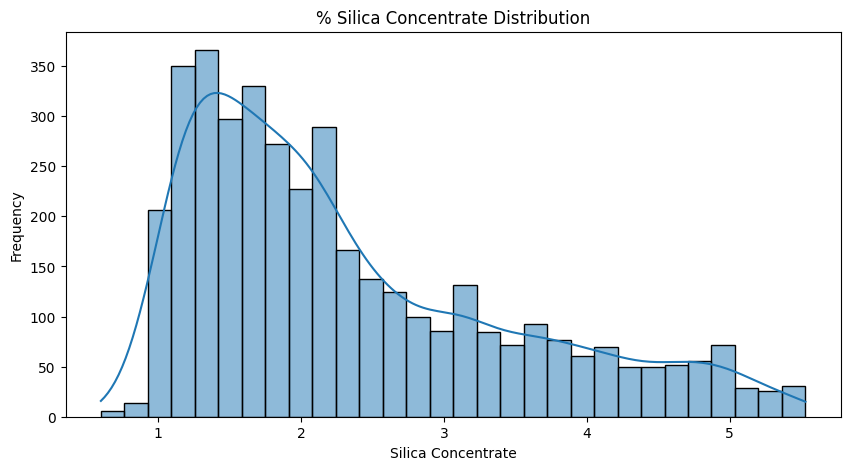

In [11]:
# Histogram of target with KDE (Kernel Density Estimate)
plt.figure(figsize=(10,5))
sns.histplot(df['% Silica Concentrate'], bins=30, kde=True)
plt.title('% Silica Concentrate Distribution')
plt.xlabel('Silica Concentrate')
plt.ylabel('Frequency')
plt.show()

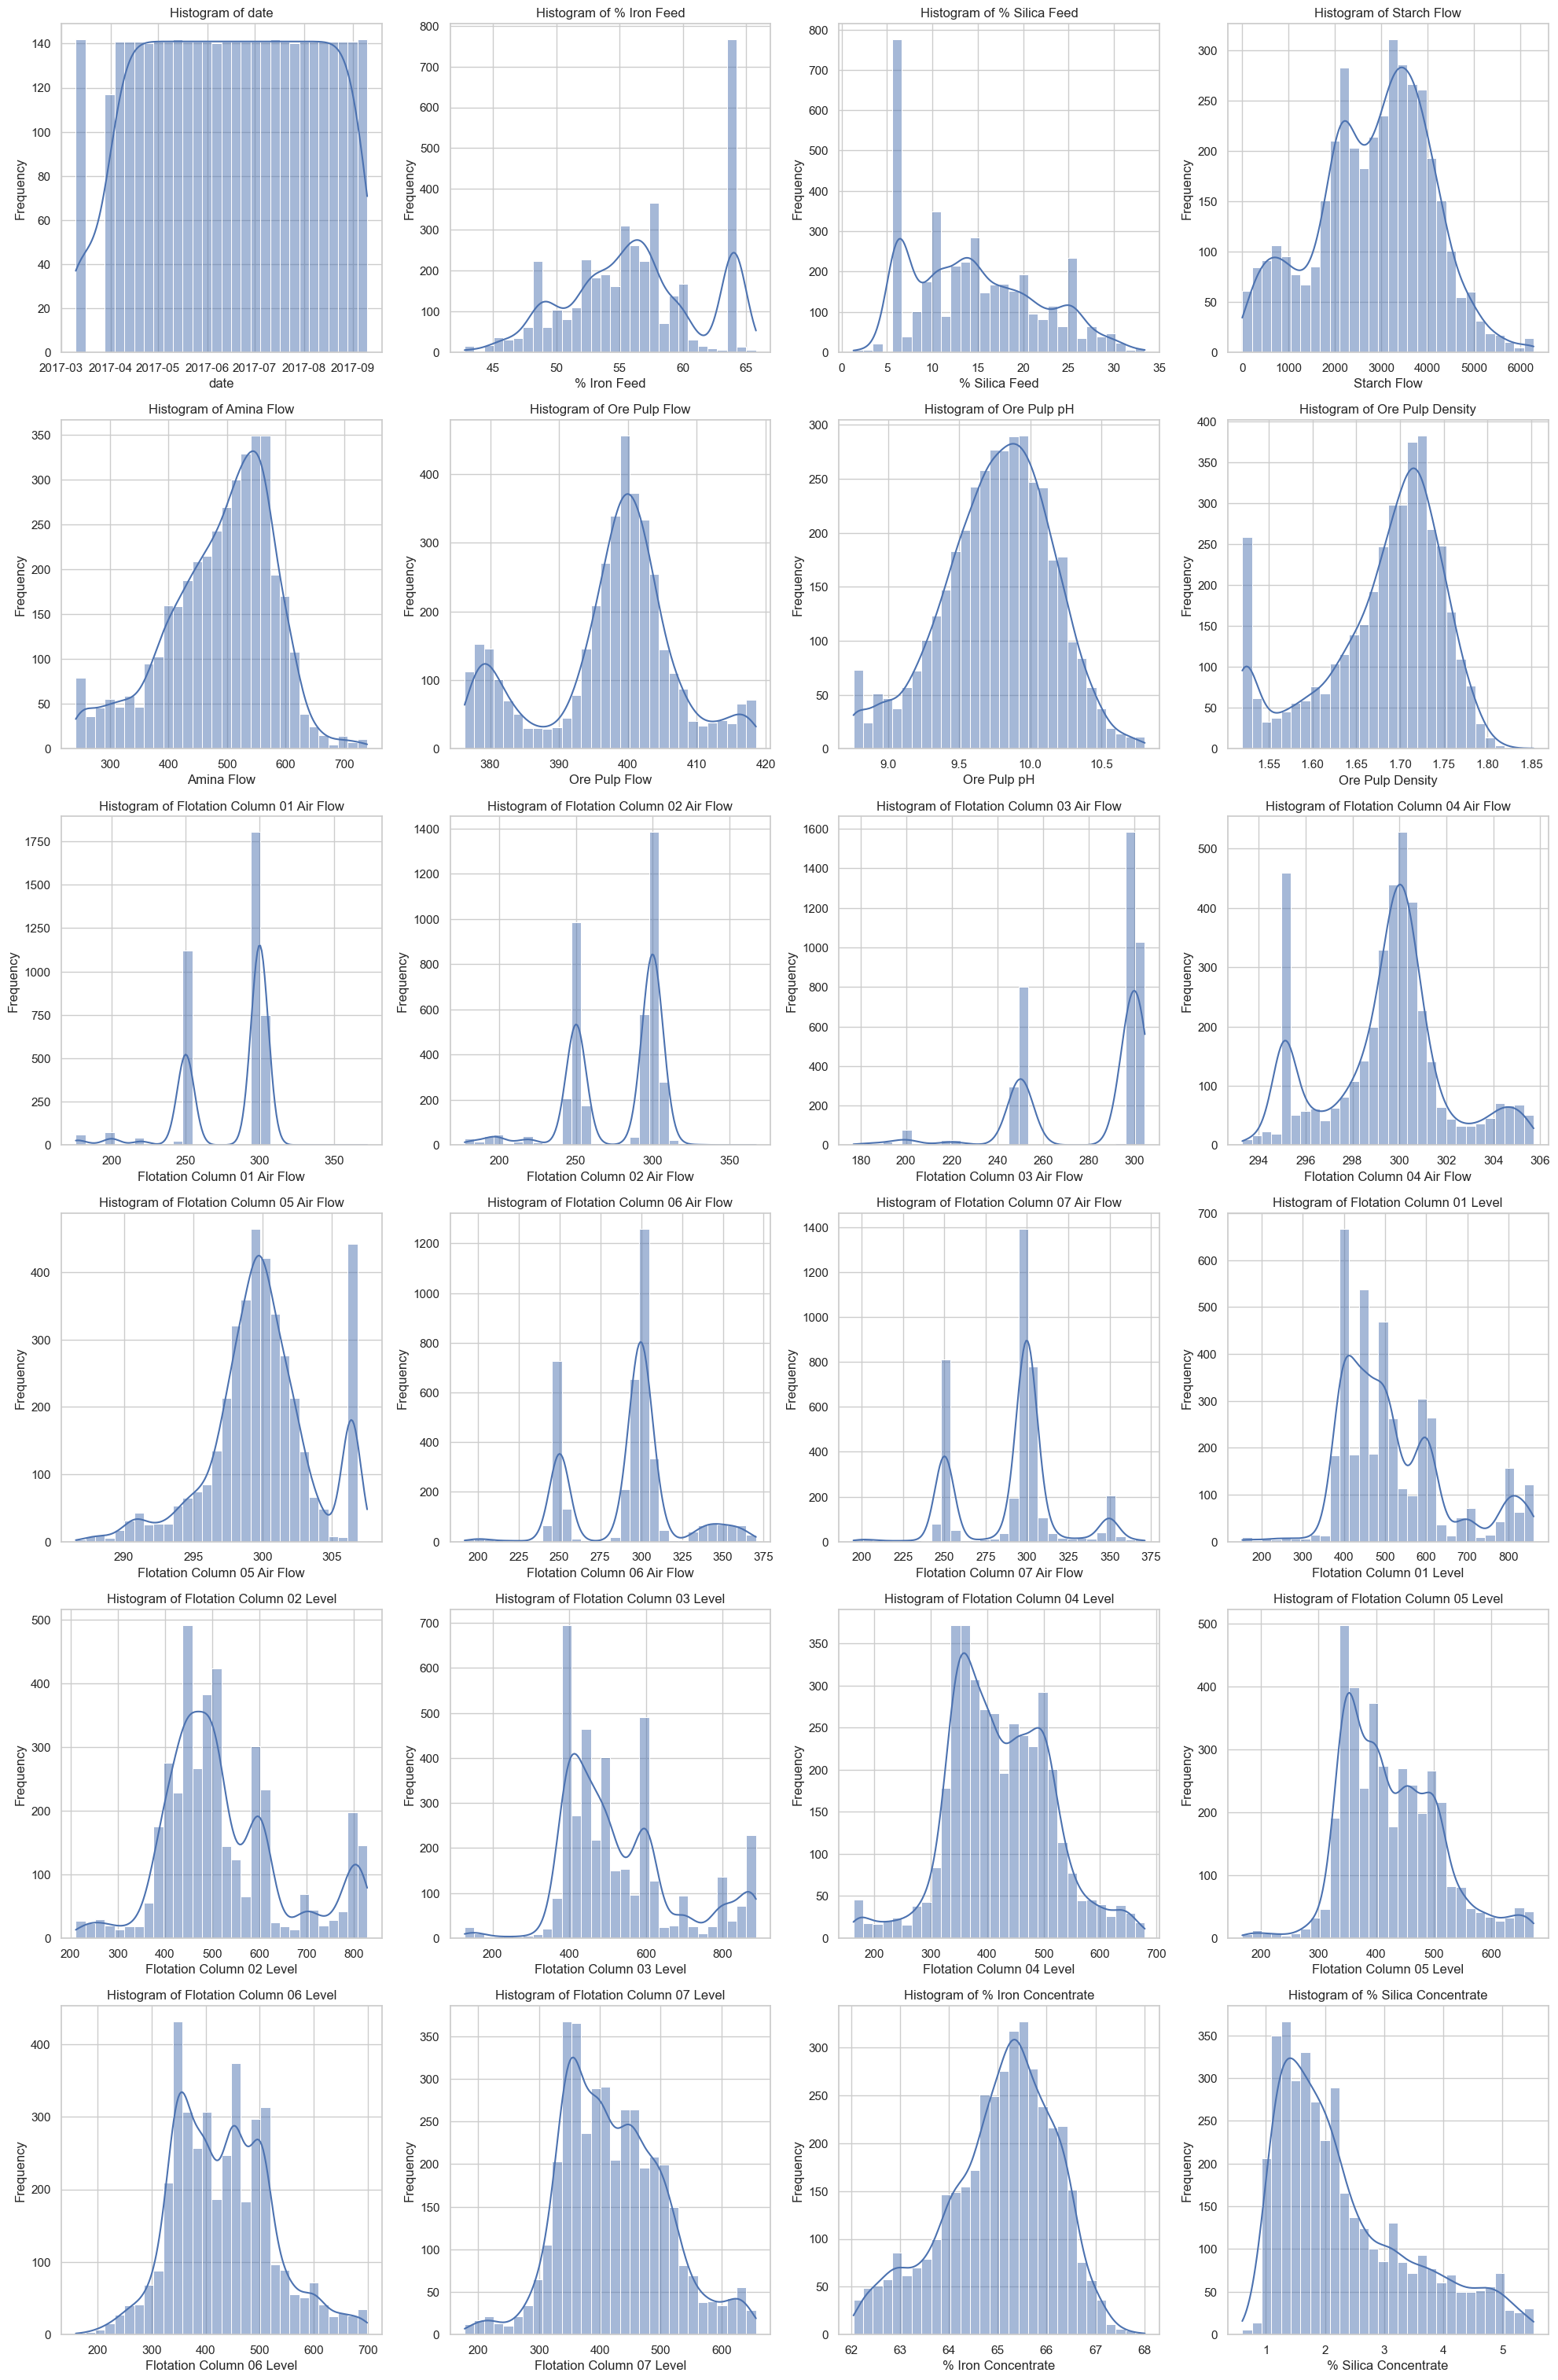

In [12]:
# Set visualization style
sns.set(style="whitegrid")

# Plot histograms for all columns
columns_to_plot = df.columns  # Use all columns
num_cols = len(columns_to_plot)

# Calculate the number of rows and columns for the grid
num_rows = (num_cols // 4) + 1  # 4 columns per row
plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size based on the number of rows

# Create subplots
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, 4, i + 1)  # Dynamic grid size
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [13]:
# Drop columns
df.drop(columns=['date'], inplace=True)

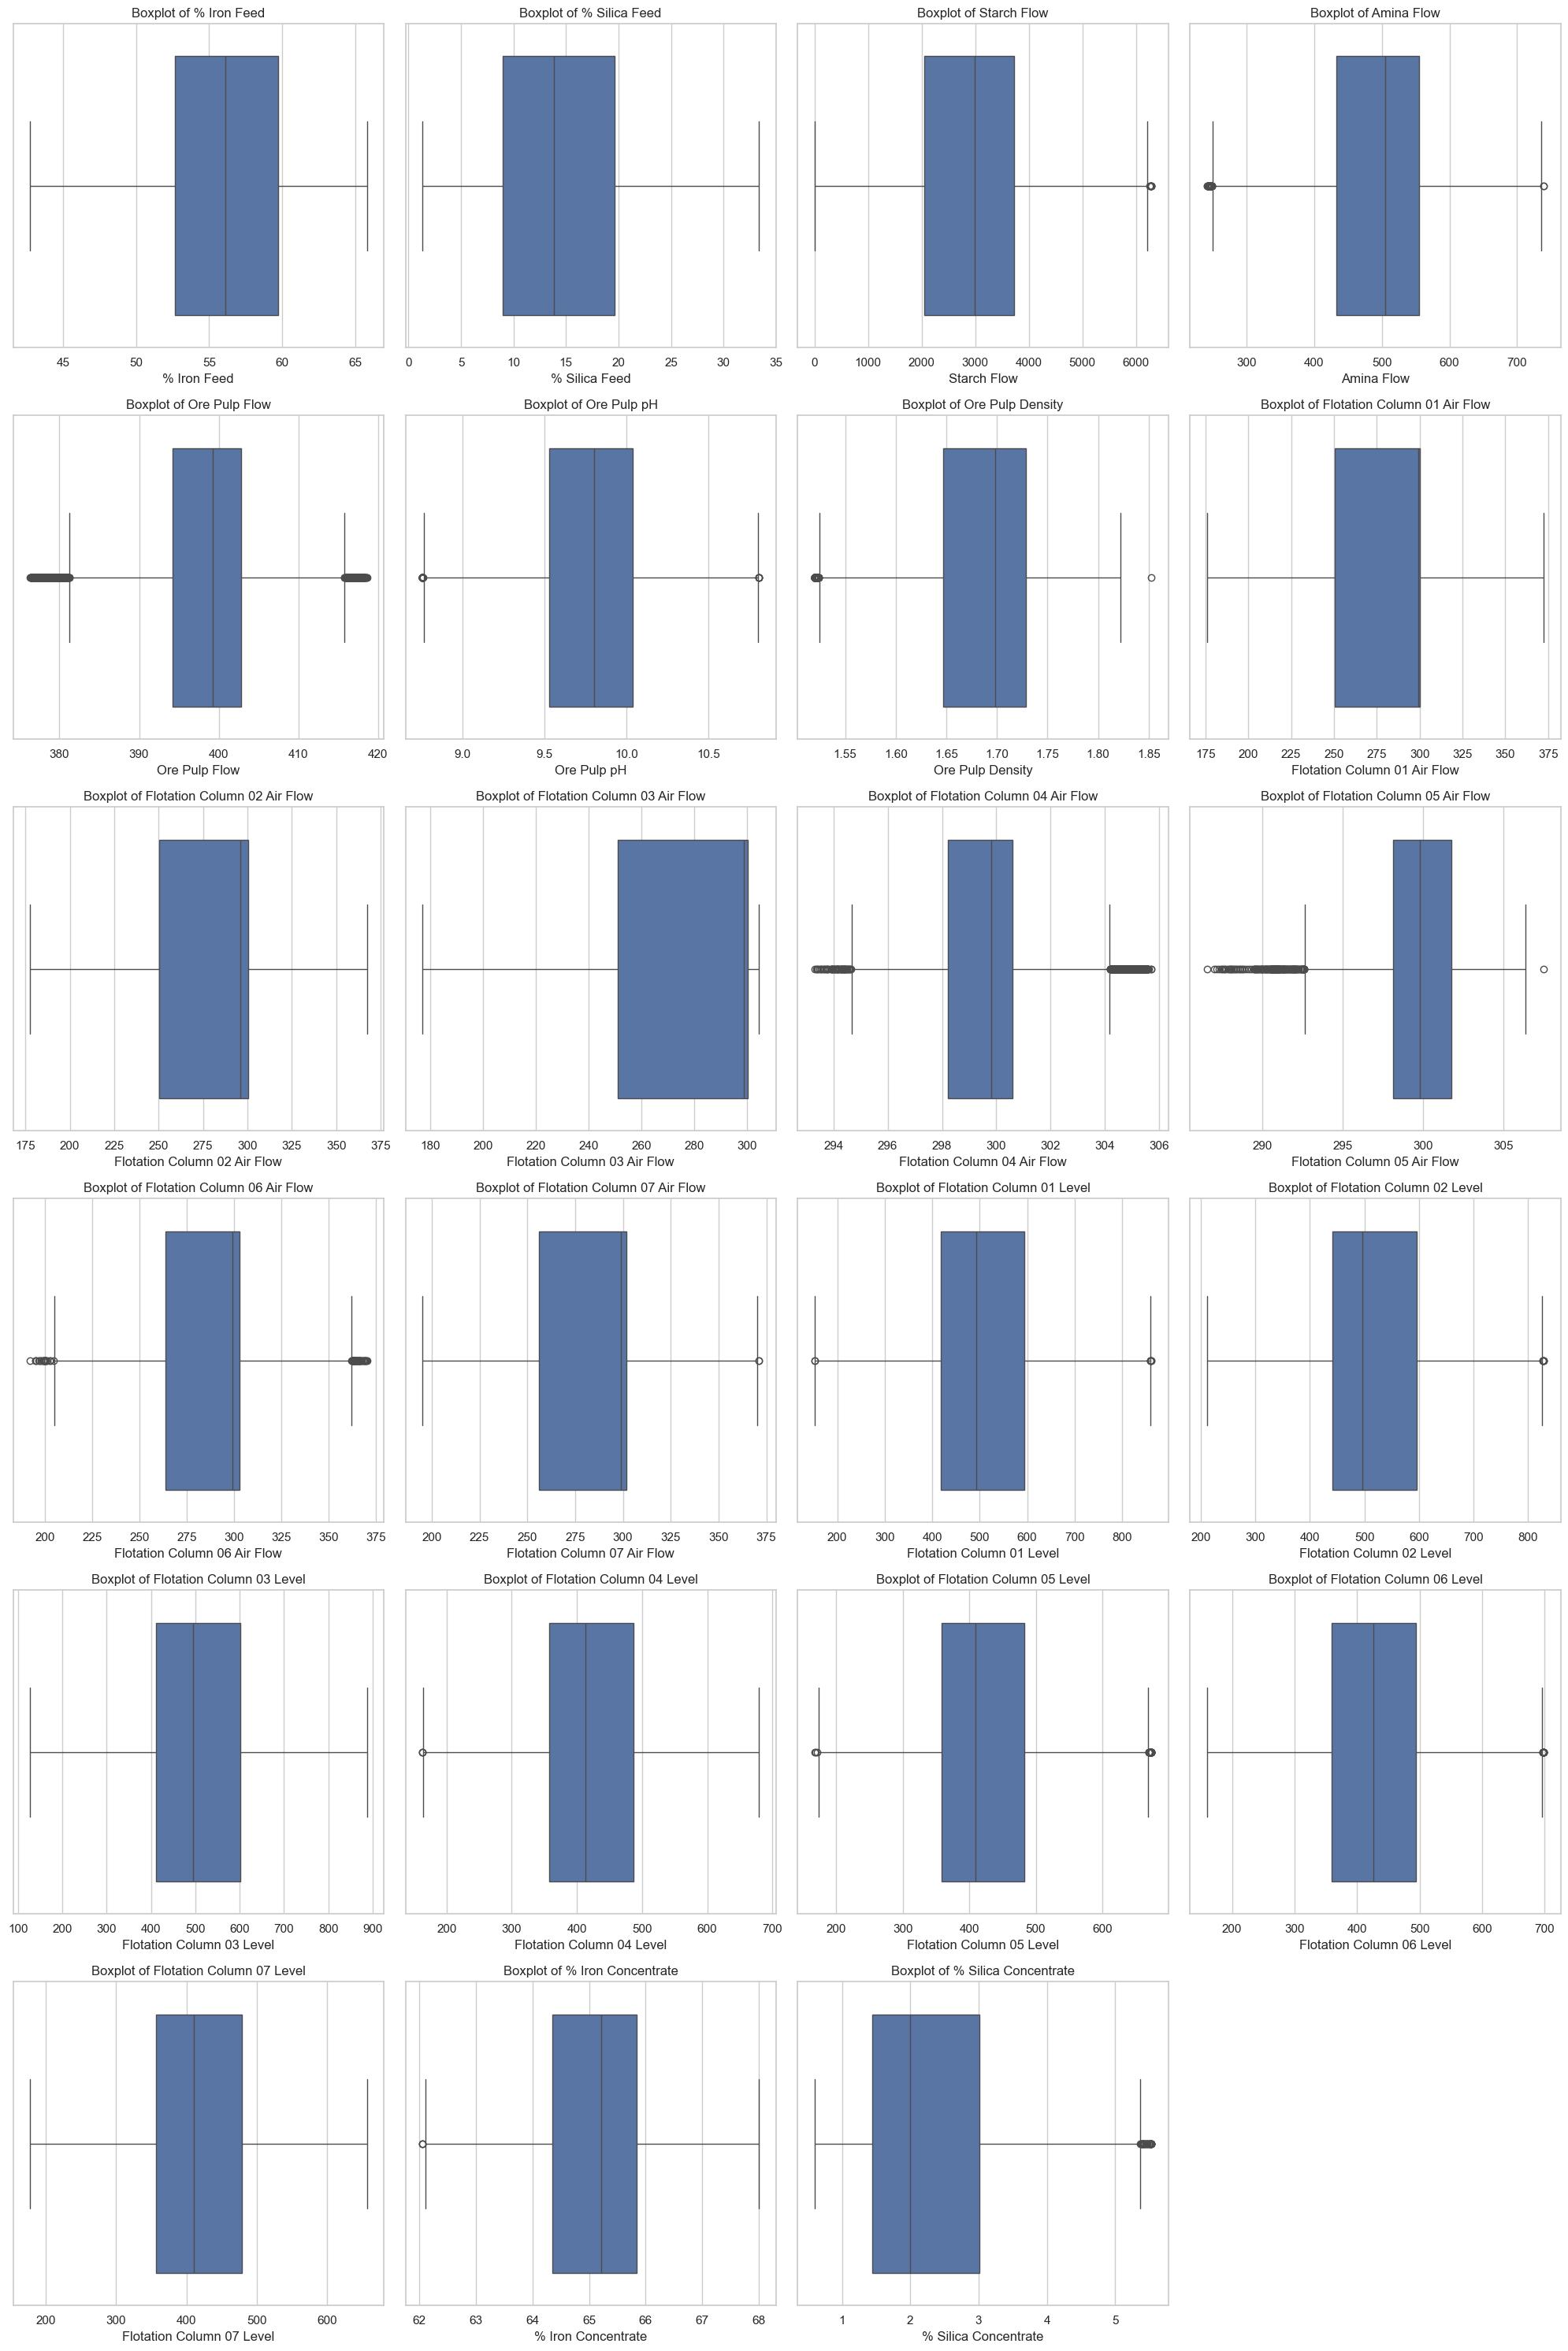

In [14]:
# Set visualization style
sns.set(style="whitegrid")

# Number of columns to plot (all columns)
num_columns_to_plot = len(df.columns)
columns_to_plot = df.columns

# Calculate the number of rows and columns for the grid
num_cols_per_row = 4  # Number of columns per row
num_rows = (num_columns_to_plot // num_cols_per_row) + 1  # Number of rows needed

# Set figure size dynamically based on the number of rows
plt.figure(figsize=(20, 5 * num_rows))

# Create subplots
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols_per_row, i + 1)  # Dynamic grid size
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [15]:
# Identify all outliers first
outlier_list = []
for col in df.columns[:13]:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    for idx, val in outliers.items():
        outlier_list.append({
            'column': col, 
            'index': idx, 
            'value': val,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })

# Display outliers summary
print(f"Total outliers found: {len(outlier_list)}")
if outlier_list:
    outlier_df = pd.DataFrame(outlier_list)
    print("\nOutliers by column:")
    print(outlier_df.groupby('column').size())
    print("\nDetailed outliers:")
    print(outlier_df)

# Now proceed with capping
print("\nProceeding with capping...")
for col in df.columns[:13]:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    original_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    
    if original_outliers > 0:
        print(f"Capped {original_outliers} outliers in '{col}' column")

Total outliers found: 964

Outliers by column:
column
% Iron Feed                     52
% Silica Feed                   73
Amina Flow                      80
Flotation Column 01 Air Flow    80
Flotation Column 02 Air Flow    80
Flotation Column 03 Air Flow    79
Flotation Column 04 Air Flow    80
Flotation Column 05 Air Flow    41
Flotation Column 06 Air Flow    79
Ore Pulp Density                80
Ore Pulp Flow                   80
Ore Pulp pH                     80
Starch Flow                     80
dtype: int64

Detailed outliers:
                           column  index    value  lower_bound  upper_bound
0                     % Iron Feed   1939   64.480    45.380000       64.030
1                     % Iron Feed   1940   64.480    45.380000       64.030
2                     % Iron Feed   1941   64.480    45.380000       64.030
3                     % Iron Feed   1942   64.480    45.380000       64.030
4                     % Iron Feed   1943   64.480    45.380000       64.030
..

In [16]:
df.to_csv('C:/Users/mjkipsz2/OneDrive - The University of Manchester/Desktop/mining_dataset_training/data/clean_data.csv', index=False)